<h2 style='color:purple' align='center'>Training And Testing Available Data</h2>

In [1]:
import pandas as pd
df = pd.read_excel(r"C:\Users\lom\Desktop\expenditure.xlsx")
df.head()

,Expenditure,Bank Charges,Conveyance (Maint),Depreciation,DTH Charges,Electrical Repair,General Repair,Gift Expenses (Maint),Guest expenses (Maint),Hiring Labour Charges,...,Party decoration,Maintenance,Miscellaneous,Diesel for OMQ,Electrical purchase,Rent and Allied charges O/S,WOC property items,Balance C/F,Total,Growth%
0,2017-18,2837,0,659240.00,85603,215841,718357,0,0,0,...,0,0,177854,27641,31073,22188,45173.00,438023,3829571.00,9.27
1,2018-19,266,20250,791534.49,66872,125925,203113,36616,100000,128960,...,0,0,1508,0,0,0,223674.29,384052,3480395.00,5.11
2,2019-2020,236,12500,747291.99,91004,115751,104718,0,0,23500,...,8500,178659,0,0,0,0,237585.49,0,3144106.48,1.99
3,2020-2021,4432,19590,691168.10,87341,231962,111870,0,0,1500,...,0,330136,0,0,0,0,97319.26,0,2855557.36,1.16


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Bar Chart (Year v/s Growth-Rate)

Text(0.5, 1.0, 'Growth-Rate')

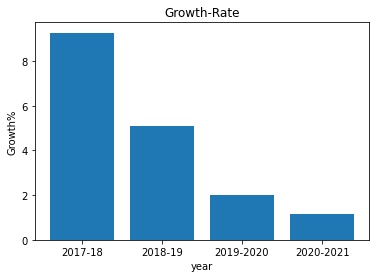

In [3]:
plt.bar(df['Expenditure'],df['Growth%'])
plt.xlabel("year")
plt.ylabel("Growth%")
plt.title("Growth-Rate")

**Looking at above Bar-Chart,we can clearly make out that there is declining pattern. This decline may be attributed to any of the expenditure factors. Let us device a method to predict Growth-rate based on various expenditure factors. 

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you taught the students in the class.
</b></p>

In [11]:
X = df[['Bank Charges','Conveyance (Maint)','Depreciation','DTH Charges','Electrical Repair','General Repair','Gift Expenses (Maint)','Guest expenses (Maint)','Hiring Labour Charges','Insurance Premium','Internet Charges','Labour Charges','Laundry Charges','Light and Decoration','Listed property account','Mobile recharge','Prepaid Insurance Maint','Petrol','Printing and Stationery','Purchase (Diesel)','Purchase (Maint)','Purchase (Electrical items)','Rent and Allied charges (Maint)','Room maintenance','Uniform charges','Wages (Maint)','Party decoration','Maintenance','Miscellaneous','Diesel for OMQ','Electrical purchase','Rent and Allied charges O/S','WOC property items','Balance C/F','Total']]

In [12]:
y = df['Growth%']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [16]:
X_train

,Bank Charges,Conveyance (Maint),Depreciation,DTH Charges,Electrical Repair,General Repair,Gift Expenses (Maint),Guest expenses (Maint),Hiring Labour Charges,Insurance Premium,...,Wages (Maint),Party decoration,Maintenance,Miscellaneous,Diesel for OMQ,Electrical purchase,Rent and Allied charges O/S,WOC property items,Balance C/F,Total
2,236,12500,747291.99,91004,115751,104718,0,0,23500,1880,...,295218,8500,178659,0,0,0,0,237585.49,0,3144106.48
3,4432,19590,691168.10,87341,231962,111870,0,0,1500,2058,...,197757,0,330136,0,0,0,0,97319.26,0,2855557.36
0,2837,0,659240.00,85603,215841,718357,0,0,0,0,...,84800,0,0,177854,27641,31073,22188,45173.00,438023,3829571.00


In [17]:
X_test

,Bank Charges,Conveyance (Maint),Depreciation,DTH Charges,Electrical Repair,General Repair,Gift Expenses (Maint),Guest expenses (Maint),Hiring Labour Charges,Insurance Premium,...,Wages (Maint),Party decoration,Maintenance,Miscellaneous,Diesel for OMQ,Electrical purchase,Rent and Allied charges O/S,WOC property items,Balance C/F,Total
1,266,20250,791534.49,66872,125925,203113,36616,100000,128960,1873,...,96400,0,0,1508,0,0,0,223674.29,384052,3480395.0


In [18]:
y_train

2    1.99
3    1.16
0    9.27
Name: Growth%, dtype: float64

In [19]:
y_test

1    5.11
Name: Growth%, dtype: float64

**Lets run linear regression model now**

In [20]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Bank Charges,Conveyance (Maint),Depreciation,DTH Charges,Electrical Repair,General Repair,Gift Expenses (Maint),Guest expenses (Maint),Hiring Labour Charges,Insurance Premium,...,Wages (Maint),Party decoration,Maintenance,Miscellaneous,Diesel for OMQ,Electrical purchase,Rent and Allied charges O/S,WOC property items,Balance C/F,Total
1,266,20250,791534.49,66872,125925,203113,36616,100000,128960,1873,...,96400,0,0,1508,0,0,0,223674.29,384052,3480395.0


In [22]:
clf.predict(X_test)

array([5.085702])

In [23]:
y_test

1    5.11
Name: Growth%, dtype: float64

# It can be seen that model predicted the Growth % as 5.08 as compared to actual 5.11. This suggests that model is fairly accurate for the dataset. Further, prediction for any year can be made by following steps:

**random_state argument**

clf.predict('236,12500,747291.99,91004,115751,104718,0,0,23500,1880,45611,7200,27947,31000,320611,0,0,0,37453,0,391408,36503,347381,75649,6500,295218,8500,178659,0,0,0,0,237585.49,0,3144106.48'
)

clf.predict('236','12500','747291.99','91004','115751','104718','0','0','23500','1880','45611','7200','27947','31000','320611','0','0','0','37453','0','391408','36503','347381','75649','6500','295218','8500','178659','0','0','0','0','237585.49','0','3144106.48'
)

In [39]:
df[['Bank Charges','Conveyance (Maint)','Depreciation','DTH Charges','Electrical Repair','General Repair','Gift Expenses (Maint)','Guest expenses (Maint)','Hiring Labour Charges','Insurance Premium','Internet Charges','Labour Charges','Laundry Charges','Light and Decoration','Listed property account','Mobile recharge','Prepaid Insurance Maint','Petrol','Printing and Stationery','Purchase (Diesel)','Purchase (Maint)','Purchase (Electrical items)','Rent and Allied charges (Maint)','Room maintenance','Uniform charges','Wages (Maint)','Party decoration','Maintenance','Miscellaneous','Diesel for OMQ','Electrical purchase','Rent and Allied charges O/S','WOC property items','Balance C/F','Total']]

,Bank Charges,Conveyance (Maint),Depreciation,DTH Charges,Electrical Repair,General Repair,Gift Expenses (Maint),Guest expenses (Maint),Hiring Labour Charges,Insurance Premium,...,Wages (Maint),Party decoration,Maintenance,Miscellaneous,Diesel for OMQ,Electrical purchase,Rent and Allied charges O/S,WOC property items,Balance C/F,Total
0,2837,0,659240.00,85603,215841,718357,0,0,0,0,...,84800,0,0,177854,27641,31073,22188,45173.00,438023,3829571.00
1,266,20250,791534.49,66872,125925,203113,36616,100000,128960,1873,...,96400,0,0,1508,0,0,0,223674.29,384052,3480395.00
2,236,12500,747291.99,91004,115751,104718,0,0,23500,1880,...,295218,8500,178659,0,0,0,0,237585.49,0,3144106.48
3,4432,19590,691168.10,87341,231962,111870,0,0,1500,2058,...,197757,0,330136,0,0,0,0,97319.26,0,2855557.36


In [41]:
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df[['Bank Charges','Conveyance (Maint)','Depreciation','DTH Charges','Electrical Repair','General Repair','Gift Expenses (Maint)','Guest expenses (Maint)','Hiring Labour Charges','Insurance Premium','Internet Charges','Labour Charges','Laundry Charges','Light and Decoration','Listed property account','Mobile recharge','Prepaid Insurance Maint','Petrol','Printing and Stationery','Purchase (Diesel)','Purchase (Maint)','Purchase (Electrical items)','Rent and Allied charges (Maint)','Room maintenance','Uniform charges','Wages (Maint)','Party decoration','Maintenance','Miscellaneous','Diesel for OMQ','Electrical purchase','Rent and Allied charges O/S','WOC property items','Balance C/F','Total']],df['Growth%'])

LinearRegression()

In [42]:
reg.coef_

array([ 1.16077004e-08, -5.54070021e-08, -3.88567520e-07, -2.80422755e-08,
        4.49526910e-07,  2.78394553e-06,  5.74899351e-09,  1.57007688e-08,
       -8.87778345e-08, -8.48923639e-09, -1.22131717e-07, -3.28787675e-08,
        2.23913186e-08,  3.55934951e-07, -1.47407517e-06,  5.20595183e-12,
        2.15100533e-11, -3.06530272e-10, -5.96159564e-08,  1.17771304e-09,
       -5.92232522e-07, -1.59365363e-07, -2.38300440e-07,  2.30083538e-06,
       -2.65631103e-08, -9.77535236e-07, -3.94176196e-08, -8.38944304e-07,
        8.02709288e-07,  1.24715457e-07,  1.40200550e-07,  1.00111666e-07,
       -8.65909816e-07,  2.03664725e-06,  3.15471980e-06])

In [43]:
reg.intercept_

-6.716581601931433

In [44]:
reg.predict([[236,12500,747291.99,91004,115751,104718,0,0,23500,1880,45611,7200,27947,31000,320611,0,0,0,37453,0,391408,36503,347381,75649,6500,295218,8500,178659,0,0,0,0,237585.49,0,3144106.48]])

array([1.99])